In [1]:
# data: Iris with all Virginica class removed; https://archive.ics.uci.edu/ml/datasets/Iris
# Iris-setosa: 0, Iris-versicolor: 1
import numpy as np
import matplotlib.pyplot as plt
from FML.Logistic.prep import FL
from FML.Logistic.Logistic import LoR 
from FML.Logistic.Logistic_L2 import LoR_L2
import matplotlib.pyplot as plt
trainfile = 'Logistic_train.csv'
testfile = 'Logistic_test.csv'
validfile = 'Logistic_validation.csv'
data_prep = FL('iris.data')
#data_prep.prep(4)

In [2]:
Logi = LoR(trainfile)
Logi.coef_SDG(4,100,0.3)
print('Error% = {}'.format(Logi.test(testfile)))

Error% = 0.0


In [3]:
Logi_L2 = LoR_L2(trainfile)
Logi_L2.coef_SDG(4,100,0.3,np.linspace(-0.01,0,10))
print('Best Lambda = {}'.format(Logi_L2.lamda[Logi_L2.validate(validfile)]))

Best Lambda = -0.01


Text(0.5, 1.0, 'Likelihood Plot')

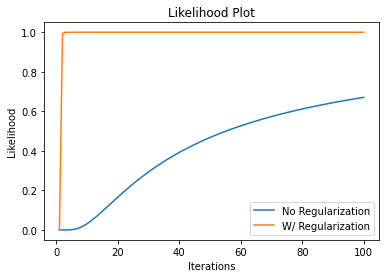

In [4]:
Logi_L2.test(testfile)
plt.figure(0)
plt.plot(np.linspace(1,100,100),Logi.Llhood, label = 'No Regularization')
plt.plot(np.linspace(1,100,100),Logi_L2.Llhood[Logi_L2.best_lambda], label = 'W/ Regularization')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Likelihood')
plt.title('Likelihood Plot')